In [129]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [130]:
!rm -rf ./out
!mkdir ./out

In [131]:
cur_dir = %pwd

In [132]:
in_files = glob.glob(os.path.join(cur_dir, "in", "*.txt"))
test_cases = [os.path.basename(f) for f in in_files]

In [133]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [134]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, "out", os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode("utf-8").strip().split("\n")[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [135]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [136]:
df = df.sort_index()

In [137]:
df.to_csv("test_res.csv")

In [138]:
df = df.iloc[:, -5:]

In [139]:
df.describe()

,2024-01-13T15:20:05.924886,2024-01-13T15:20:40.384057,2024-01-13T15:41:52.889862,2024-01-13T17:23:07.714128,2024-01-13T17:58:33.304986
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5661.792000,5661.792000,5671.364000,6166.316000,6168.418000
std,121.509365,121.509365,120.947443,97.336308,96.361914
min,5284.000000,5284.000000,5316.000000,5750.000000,5828.000000
25%,5582.000000,5582.000000,5596.000000,6107.750000,6106.750000
50%,5668.000000,5668.000000,5679.000000,6166.000000,6173.000000
75%,5746.500000,5746.500000,5756.000000,6233.500000,6237.000000
max,5998.000000,5998.000000,5998.000000,6403.000000,6428.000000


In [140]:
df.iloc[:, -1].mean()

6168.418

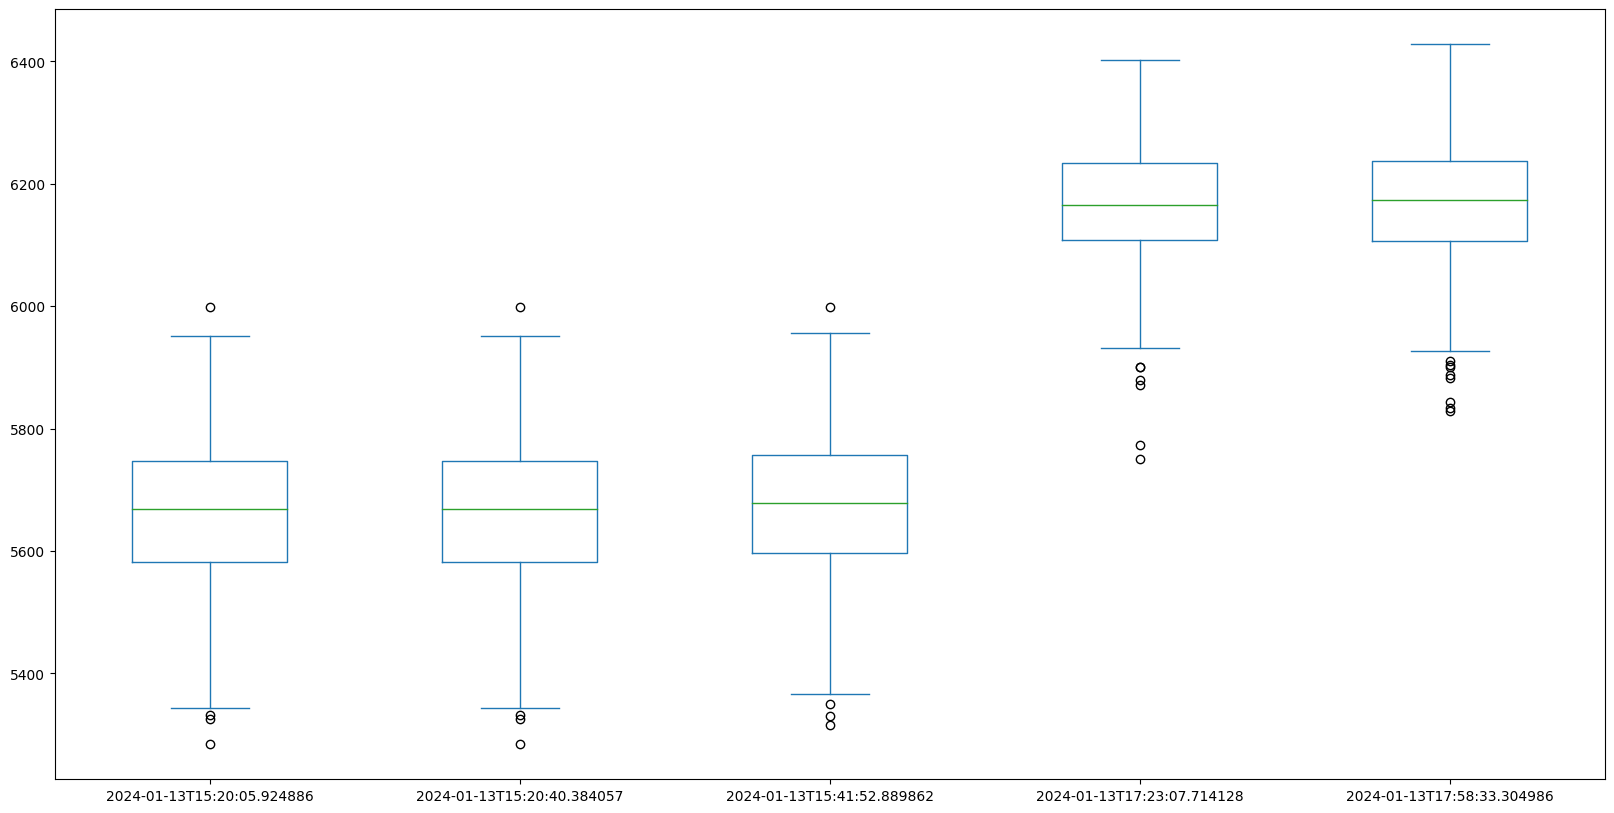

In [141]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [142]:
df.sort_values(by=[cur_time], ascending=False)

,2024-01-13T15:20:05.924886,2024-01-13T15:20:40.384057,2024-01-13T15:41:52.889862,2024-01-13T17:23:07.714128,2024-01-13T17:58:33.304986
0042.txt,5860,5860,5896,6347,6428
0056.txt,5902,5902,5910,6394,6419
0301.txt,5998,5998,5998,6357,6404
0312.txt,5912,5912,5912,6349,6386
0135.txt,5896,5896,5916,6366,6378
...,...,...,...,...,...
0123.txt,5332,5332,5350,5931,5887
0010.txt,5344,5344,5370,5952,5883
0139.txt,5284,5284,5316,5773,5843
0215.txt,5452,5452,5460,5945,5833


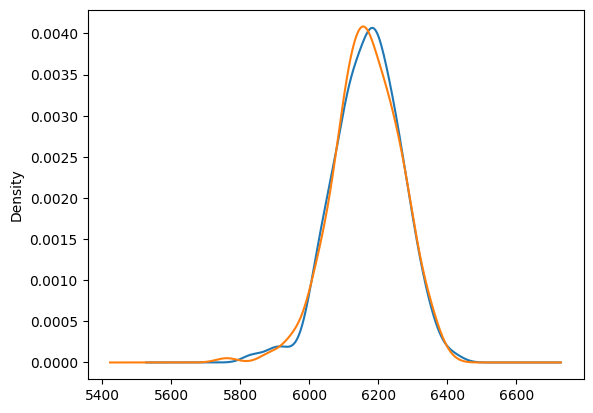

In [143]:
# bins = np.linspace(0, 10, 40)
last_sel = df.iloc[:, -1]
last_sel.plot.kde()
last2_sel = df.iloc[:, -2]
last2_sel.plot.kde()
plt.show()

In [144]:
last_df = df.iloc[:, -1]
wins = df.sub(last_df, axis=0)<0
loses = df.sub(last_df, axis=0)>0
win_cnt = wins.sum(axis=0)
lose_cnt = loses.sum(axis=0)
(win_cnt - lose_cnt).sort_index(ascending=False)

2024-01-13T17:58:33.304986      0
2024-01-13T17:23:07.714128     -6
2024-01-13T15:41:52.889862    500
2024-01-13T15:20:40.384057    500
2024-01-13T15:20:05.924886    500
dtype: int64